# AMEX Default-prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_data.csv',nrows=10000,parse_dates=["S_2"])

df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [3]:

df.columns.values

array(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2',
       'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50',
       'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11',
       'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13',
       'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15',
       'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18',
       'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21',
       'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73',
       'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10',
       'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13',
       'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18',
       'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19',
   

In [5]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 190 columns):
 #    Column       Non-Null Count  Dtype         
---   ------       --------------  -----         
 0    customer_ID  10000 non-null  object        
 1    S_2          10000 non-null  datetime64[ns]
 2    P_2          9936 non-null   float64       
 3    D_39         10000 non-null  float64       
 4    B_1          10000 non-null  float64       
 5    B_2          10000 non-null  float64       
 6    R_1          10000 non-null  float64       
 7    S_3          8248 non-null   float64       
 8    D_41         10000 non-null  float64       
 9    B_3          10000 non-null  float64       
 10   D_42         1355 non-null   float64       
 11   D_43         6913 non-null   float64       
 12   D_44         9505 non-null   float64       
 13   B_4          10000 non-null  float64       
 14   D_45         10000 non-null  float64       
 15   B_5          10000 non-null  float6

In [5]:
df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,9936.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,8248.000000,1.000000e+04,10000.000000,1355.000000,6913.000000,...,372.000000,372.000000,372.000000,9.847000e+03,9.937000e+03,9.847000e+03,1572.000000,9847.000000,9.937000e+03,9.847000e+03
mean,0.650498,1.570308e-01,0.126147,0.617122,0.074035,0.227838,6.473782e-02,0.135379,0.173210,0.153766,...,0.229368,0.015669,0.218863,1.646316e-01,2.286722e-02,1.505506e-01,0.370263,0.162935,4.636371e-02,5.784571e-02
std,0.252416,2.758269e-01,0.212428,0.403145,0.219977,0.196746,1.969007e-01,0.238910,0.188531,0.203790,...,0.205791,0.103492,0.308344,3.662716e-01,1.323064e-01,3.347093e-01,0.249771,0.364742,1.741972e-01,2.269450e-01
min,-0.256921,8.701630e-07,-0.141469,0.000034,0.000003,-0.151649,6.841272e-07,0.000003,0.000697,0.000010,...,0.000045,0.000003,0.000024,5.934267e-07,5.821456e-07,2.562315e-07,-0.008804,0.000002,7.773110e-07,1.577788e-07
25%,0.471264,4.573938e-03,0.009126,0.091656,0.002863,0.128615,2.998132e-03,0.005326,0.046385,0.040649,...,0.008208,0.002268,0.004214,2.940035e-03,2.627201e-03,3.001612e-03,0.150429,0.002939,2.674433e-03,2.966105e-03
50%,0.690195,9.296279e-03,0.032948,0.814048,0.005726,0.163527,5.866382e-03,0.010243,0.133838,0.081796,...,0.253035,0.005048,0.008086,5.969675e-03,5.191741e-03,5.909631e-03,0.352169,0.005944,5.323101e-03,5.931741e-03
75%,0.866060,2.380151e-01,0.122675,1.002262,0.008528,0.260673,8.820872e-03,0.169040,0.236997,0.180020,...,0.258497,0.007452,0.503998,8.946506e-03,7.664635e-03,8.828591e-03,0.559880,0.008907,8.104901e-03,8.878259e-03
max,1.009926,4.268383e+00,1.323411,1.009999,2.259283,1.803549,2.592768e+00,1.258546,2.556439,2.320434,...,1.005479,1.009248,1.507652,1.009997e+00,1.009970e+00,1.112668e+00,1.185992,1.010000,1.342362e+00,4.282032e+00


In [6]:
df.shape

(10000, 190)

In [7]:
df.isnull().sum().values

array([   0,    0,   64,    0,    0,    0,    0, 1752,    0,    0, 8645,
       3087,  495,    0,    0,    0,    0, 2291,    0, 1303, 8896,    0,
          0,   41, 5293,    0,    0,    0,   39,  512,    0, 7267,    0,
          0,    0,    0,    0, 1752,    0,    0,  297, 5164,   84,    0,
          0, 5294,    0,  171,    0, 1114,   13,    0, 1426,    0,  344,
          0,    0, 5446,    0,    0, 8867,    0,  329,    0,    0,    0,
          0,  321,    0,  142,    0,   32,    0,    0, 9926,    0,   16,
          0, 8976,    0,    0, 4694,   13,    0,  495,  100,    0, 9356,
          0,   16,    0,    0,    0,   37, 7168,    0,    0,    0,    0,
        321,    0,    0,   39,    0, 9339,    0,    0,    0, 9990,    0,
          0, 9980,    0,    0,    0,    0,    0,    1,    0,    0,   39,
          0,    0,  260,    0,    0,    0,    0,    0,    0,   34,    1,
         34,   30,    2,   63,  153,  153, 5523, 8905,  153,    0,    0,
       8785,  240,    0, 9944,    2, 9975, 9975, 99

In [8]:
[features for features in df.columns if df[features].isnull().sum()>0]

['P_2',
 'S_3',
 'D_42',
 'D_43',
 'D_44',
 'D_46',
 'D_48',
 'D_49',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_59',
 'D_61',
 'B_15',
 'D_62',
 'D_64',
 'B_17',
 'D_66',
 'D_68',
 'D_69',
 'D_70',
 'D_72',
 'D_73',
 'D_74',
 'D_76',
 'D_77',
 'B_25',
 'D_78',
 'D_79',
 'R_9',
 'D_80',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'B_29',
 'D_87',
 'D_88',
 'R_20',
 'D_89',
 'D_91',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'R_26',
 'R_27',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'S_27',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_128',
 'D_129',
 'B_41',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

<AxesSubplot:>

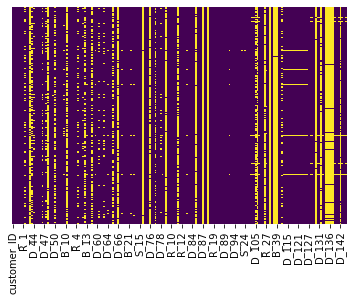

In [9]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.duplicated()==False


0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool

In [11]:
df_label = pd.read_csv('train_labels.csv',nrows=10000)
df_label.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [12]:
df_label['target'].value_counts()

0    7351
1    2649
Name: target, dtype: int64

In [13]:
final_df = pd.merge(df,df_label,on='customer_ID',how='left')

In [14]:
final_df['target'].value_counts()

0    7447
1    2553
Name: target, dtype: int64

In [15]:
len(final_df)

10000

In [16]:
final_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 191 columns):
 #    Column       Non-Null Count  Dtype         
---   ------       --------------  -----         
 0    customer_ID  10000 non-null  object        
 1    S_2          10000 non-null  datetime64[ns]
 2    P_2          9936 non-null   float64       
 3    D_39         10000 non-null  float64       
 4    B_1          10000 non-null  float64       
 5    B_2          10000 non-null  float64       
 6    R_1          10000 non-null  float64       
 7    S_3          8248 non-null   float64       
 8    D_41         10000 non-null  float64       
 9    B_3          10000 non-null  float64       
 10   D_42         1355 non-null   float64       
 11   D_43         6913 non-null   float64       
 12   D_44         9505 non-null   float64       
 13   B_4          10000 non-null  float64       
 14   D_45         10000 non-null  float64       
 15   B_5          10000 non-null  float6

Text(0, 0.5, 'Target')

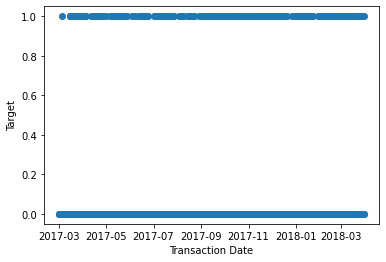

In [17]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(final_df['S_2'][:1000],final_df['target'][:1000])
plt.xlabel('Transaction Date')
plt.ylabel('Target')

In [18]:
final_df.S_2.head()

0   2017-03-09
1   2017-04-07
2   2017-05-28
3   2017-06-13
4   2017-07-16
Name: S_2, dtype: datetime64[ns]

In [19]:
final_df.columns.values

array(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2',
       'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50',
       'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11',
       'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13',
       'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15',
       'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18',
       'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21',
       'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73',
       'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10',
       'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13',
       'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18',
       'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19',
   

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables

with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='P_2', ylabel='target'>

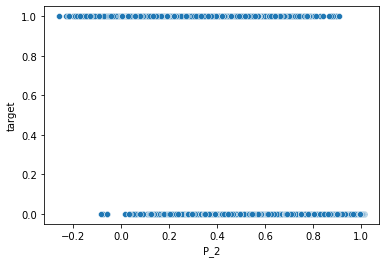

In [20]:
import seaborn as sns
sns.scatterplot(final_df['P_2'],final_df['target'])

In [21]:
final_df['B_30'].value_counts()

0.0    8411
1.0    1474
2.0     115
Name: B_30, dtype: int64

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D_46', ylabel='Density'>

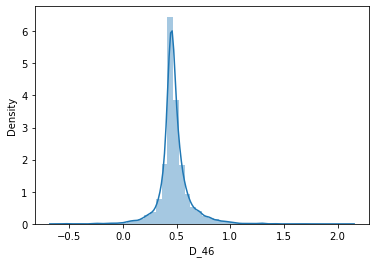

In [22]:
sns.distplot(final_df['D_46'])

In [23]:
# changing dtype of categorical features into category
categorical_features = ['B_30','B_38','D_63','D_64','D_66','D_68','D_114','D_116','D_117','D_120','D_126']
final_df[categorical_features] = final_df[categorical_features].astype('category')
final_df[categorical_features].dtypes

B_30     category
B_38     category
D_63     category
D_64     category
D_66     category
D_68     category
D_114    category
D_116    category
D_117    category
D_120    category
D_126    category
dtype: object

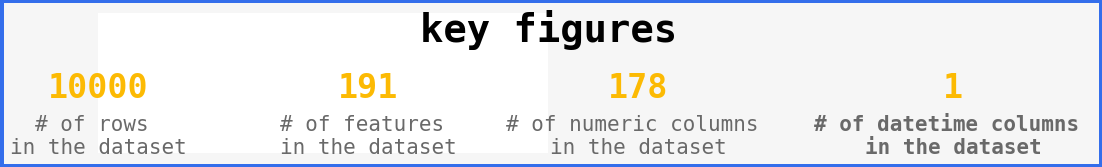

In [24]:
import matplotlib as mpl
import numpy as np
mpl.rcParams.update(mpl.rcParamsDefault) # recover matplotlib defaults after setting stylesheets

data = final_df
df_dtypes = final_df.dtypes.value_counts()


fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'

ax.text(1,0.8,"key figures", color="black", fontsize=28,fontweight='bold',fontfamily=font,ha='center')
ax.text(0,0.4,"{:d}".format(data.shape[0]),color='#fcba03',fontsize=24,fontweight='bold',fontfamily=font,ha='center')

ax.text(0,0.001,"# of rows \nin the dataset",color='dimgrey',fontsize=15,fontweight='light',fontfamily=font,ha='center')
ax.text(0.6,0.4,"{}".format(data.shape[1]),color="#fcba03",fontsize=24,fontweight='bold',fontfamily=font,ha='center')

ax.text(0.6,0.001,"# of features \nin the dataset",color='dimgrey',fontsize=15,fontweight='light',fontfamily=font,
        ha='center')
ax.text(1.2,0.4,'{}'.format(len(data.select_dtypes(np.number).columns)),color='#fcba03',fontsize=24,fontweight='bold',
       fontfamily=font,ha='center')
ax.text(1.2, 0.001, "# of numeric columns \nin the dataset",color='dimgrey',
        fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax.text(1.9, 0.4,"{}".format(len(data.select_dtypes('datetime64[ns]').columns)), color='#fcba03', fontsize=24,
        fontweight='bold', fontfamily=font, ha='center')
ax.text(1.9,0.001,"# of datetime columns \nin the dataset", color='dimgray',fontsize=15,fontweight='bold',
        fontfamily=font,ha='center')

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)
    
fig.subplots_adjust(top=0.9,bottom=0.2,left=0,hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#346eeb')
fig.patch.set_facecolor('#f6f6f6')
fig.set_facecolor('#f6f6f6')

plt.show()

 Checking date range in our database

In [25]:
print(f"train date range id from {final_df['S_2'].min()} to {final_df['S_2'].max()}")

train date range id from 2017-03-01 00:00:00 to 2018-03-31 00:00:00


### Handling missing data

 - lets see how many missing values do we have

In [26]:
tmp = final_df.isna().sum().div(len(final_df)).mul(100).sort_values(ascending=False)
len(tmp)

191

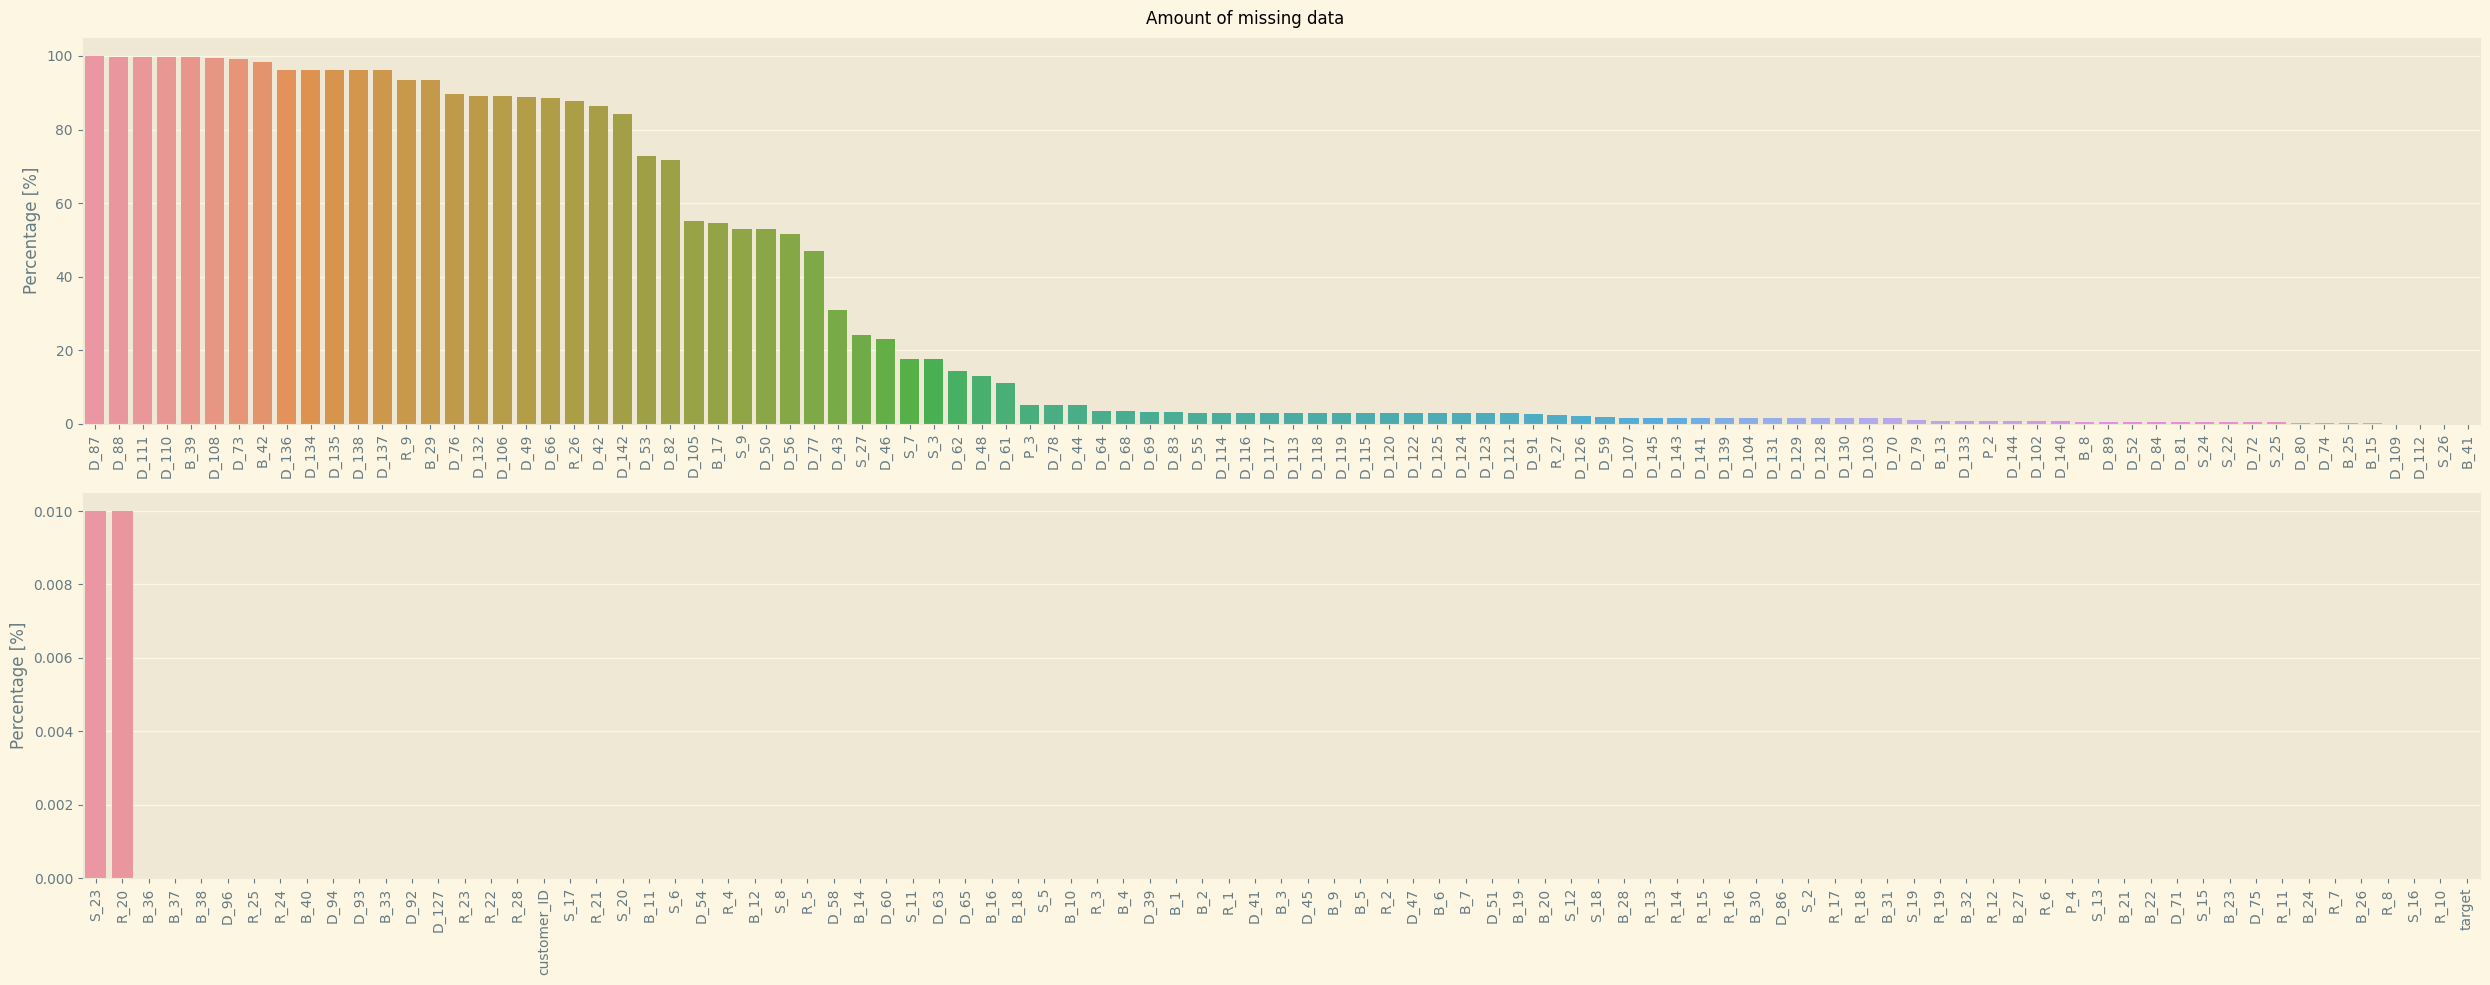

In [27]:
plt.style.use('Solarize_Light2')
fig,ax = plt.subplots(2,1,figsize=(25,10))

sns.barplot(x=tmp[:100].index,y=tmp[:100].values,ax=ax[0])
sns.barplot(x=tmp[100:].index,y=tmp[100:].values,ax=ax[1])

ax[0].set_ylabel('Percentage [%]')
ax[1].set_ylabel('Percentage [%]')

ax[0].tick_params(axis='x',rotation=90)# setting x axis ticks 
ax[1].tick_params(axis='x',rotation=90)

plt.suptitle('Amount of missing data')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

plt.show()

There are significant nuber of features with lot's of missing data

### Distribution of target variable

In [28]:
tmp = final_df['target'].value_counts().div(len(final_df)).mul(100)
tmp

0    74.47
1    25.53
Name: target, dtype: float64

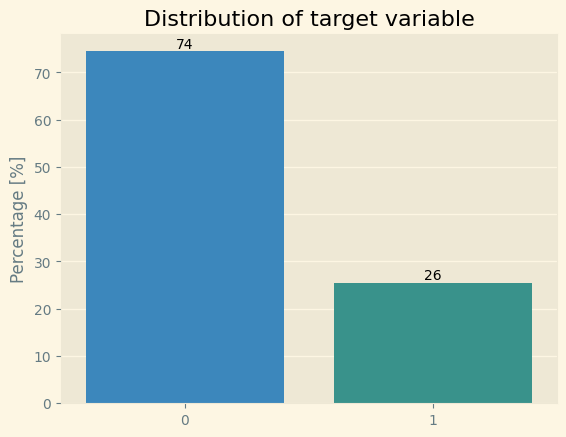

In [29]:
ax = sns.barplot(x=tmp.index,y=tmp.values)
ax.bar_label(ax.containers[0],fmt='%.f')
plt.title('Distribution of target variable')
plt.ylabel('Percentage [%]')
plt.show()

In [30]:
# number of unique customers
print(f'number of unique customers: {final_df["customer_ID"].nunique()}')

number of unique customers: 826


### Customer presence

In [31]:
cust_presence = final_df.groupby(['customer_ID','target']).size().reset_index().rename(columns={0:'presence'})
type(cust_presence)

pandas.core.frame.DataFrame

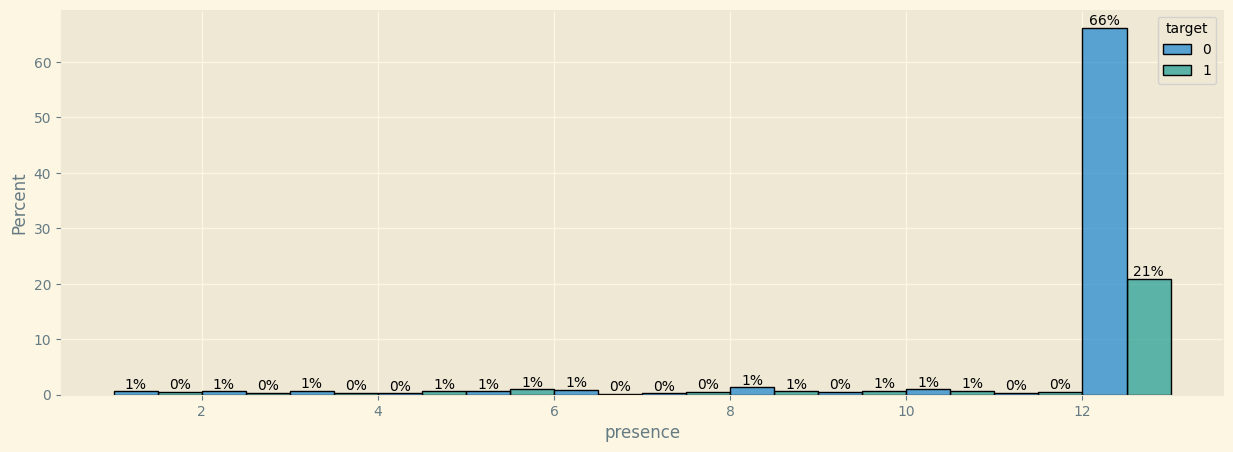

In [32]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
sns.histplot(x='presence',data=cust_presence,hue='target',stat='percent',multiple='dodge',
            bins=np.arange(1,14),ax=ax)
ax.bar_label(ax.containers[0],fmt='%.f%%')
ax.bar_label(ax.containers[1],fmt='%.f%%')
plt.show()

The plot above shows that how ling customers are present in a dataset. It shows that 93 percent of them are visible for the full year.it's difficult from this graph to see how targets are distributed for the remaining customers, so let's zoom

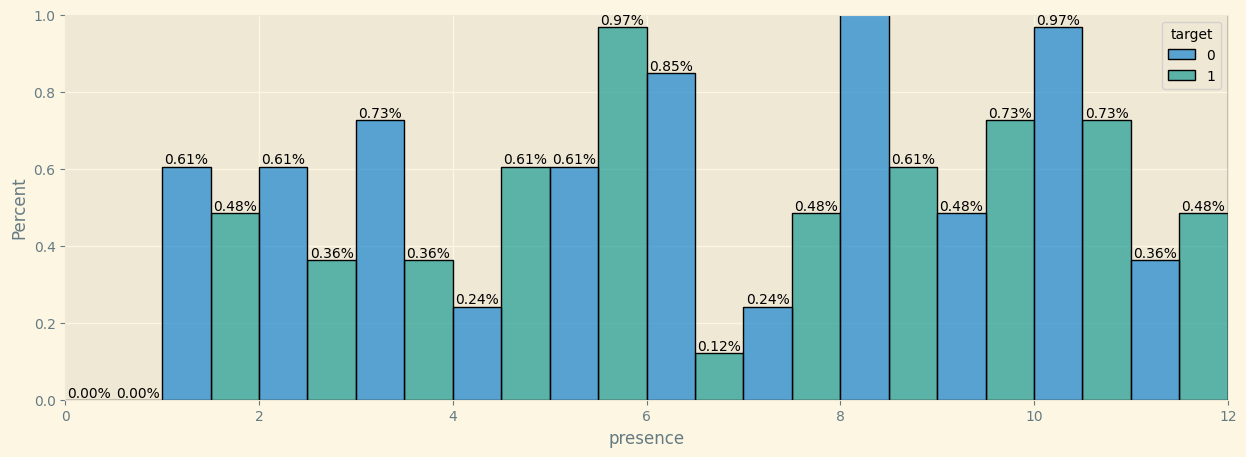

In [33]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
sns.histplot(x='presence',data=cust_presence,hue='target',stat='percent',
            multiple='dodge',bins=np.arange(0,14),ax=ax)
ax.bar_label(ax.containers[0],fmt='%.2f%%')
ax.bar_label(ax.containers[1],fmt='%.2f%%')

ax.set_xlim(0,12)
ax.set_ylim(0,1)

plt.show()

now its clear that customers who are for short term in a database are more prone to churn. We can now add this information as an additional feature if we want. 

In [34]:
import gc
short_customer_ids = list(cust_presence[cust_presence['presence']<13]['customer_ID'])
gc.collect() # run garbage collector

51618

In [35]:
short_customers = final_df[final_df['customer_ID'].isin(short_customer_ids)][['customer_ID','S_2']]
short_customers['month'] = short_customers['S_2'].dt.month
short_customers['year'] = short_customers['S_2'].dt.year
short_customers.groupby(['year','month']).size()

year  month
2017  3         11
      4         27
      5         23
      6         39
      7         46
      8         64
      9         69
      10        75
      11        86
      12        94
2018  1        104
      2        113
      3        123
dtype: int64

In [36]:
len(short_customers)

874

Now its clear that short customers are also these who dropped from the observation period as well. Let's see data for an exemplory customer from this sample

In [37]:
cust_2obs_03_2017 = list(short_customers.loc[(short_customers['year']==2017) & (short_customers['month']==3),
                                             'customer_ID'])
cust_2obs_03_2017

['0005a6ae24fd274640a237ea56c43b1ef9e32077ad168a90d464dcf2bd5976fb',
 '0021fda1616bd44277fc444066dccfc5078d7625427e69845be6b212317a4556',
 '00225149c16c9a4c37a3e97ee0358ff482e588423afed1a79b0304221ee5e8fe',
 '0022c2a2417deff2632c5f26a23154ab2b5dbe3c98bf73467aeffd63b9eb66ba',
 '002d86c8c1bbb7b72fa6d8684dfcf2bfbeb215597e7dcc37abc9edee6703bf95',
 '0033a54b7a8bf7499a55c2bc198ec5a7879e7395ef2e7e468762de63fd2c063a',
 '0059b48cd663ab07d50d5429ac50905808488acb525da68a2805ac06e58a2cc7',
 '005ac6e5eadd997c328b820c8705f55febdb5cba28cb5fbfa20d998703891d1a',
 '006f9a9b28ef9c45e0c8eaf9ec43b6f5ab34083c90a4ee53cac99829f2218d0b',
 '007659a996e93ba05f0f598159bfb550ba703a33a1e22847b58a1fdc2d55b030',
 '0077b7efafef4cfa81e42538b87e39799e9928e47c6826e9914f70da02c20dc5']

In [38]:
sample_customer = np.random.choice(cust_2obs_03_2017)
final_df[final_df['customer_ID']==sample_customer].head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
9811,007659a996e93ba05f0f598159bfb550ba703a33a1e228...,2017-03-13,0.168585,0.009663,0.036913,0.811042,0.252248,0.136217,0.008275,0.280326,...,NaN,NaN,1.009988,1.006305,0.914837,0.248925,1.008150,0.000049,0.098736,1
9812,007659a996e93ba05f0f598159bfb550ba703a33a1e228...,2017-04-12,0.185535,0.004092,0.040198,0.111883,0.008083,0.169546,0.001402,0.261728,...,NaN,NaN,1.003495,1.001599,0.910272,0.253710,1.002648,0.001022,0.091295,1
9813,007659a996e93ba05f0f598159bfb550ba703a33a1e228...,2017-05-26,0.197330,0.008542,0.115845,0.006221,0.509068,0.159213,0.004848,0.191550,...,NaN,NaN,NaN,0.009932,NaN,NaN,NaN,0.001127,NaN,1
9814,007659a996e93ba05f0f598159bfb550ba703a33a1e228...,2018-02-10,0.347941,0.035962,0.142211,0.065895,0.002135,0.141553,0.005772,0.472472,...,NaN,NaN,1.007589,1.009171,0.918403,0.291741,1.007612,0.006014,0.096914,1
9815,007659a996e93ba05f0f598159bfb550ba703a33a1e228...,2018-03-31,0.361388,0.568627,0.200456,0.044738,1.509404,0.162245,0.001135,0.420629,...,NaN,NaN,1.003300,1.002836,0.924928,0.302005,1.000739,0.000625,0.093112,1


### Correlations
Before we dive into distributions of individual features let's check are there any highly correlated ones. Because it would take ages to calculate the entire correlation matrix I'll use approximate method by using a sample of 25% of customers.

In [42]:
def sample_full_cust(df,cust_ratio):
    n_customer = df['customer_ID'].nunique()
    no_of_cust = int(n_customer*cust_ratio)
    cust_ids = np.random.choice(df['customer_ID'].unique(),no_of_cust)#Generates a random sample from a given 1-D array
    print(f'number of customer sampled : {no_of_cust}')
    ready_df = df[df['customer_ID'].isin(cust_ids)]
    print(f'number of rows sampled : {len(ready_df)}({round(len(ready_df)/len(df)*100)}%)')
    return ready_df
    

In [44]:
train_samples = sample_full_cust(final_df,0.55)
train_samples

number of customer sampled : 454
number of rows sampled : 4261(43%)


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
39,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-03-31,0.567442,0.268476,0.070311,0.812053,0.004228,0.407420,0.007732,0.010927,...,NaN,NaN,0.003295,0.004272,0.000242,NaN,0.006266,0.001873,0.007589,0
40,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-04-21,0.568356,0.001642,0.083223,0.819809,0.006591,0.228103,0.005514,0.002281,...,NaN,NaN,0.007134,0.009733,0.006759,NaN,0.009192,0.002681,0.009768,0
41,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-05-29,0.581232,0.206867,0.279991,1.004374,0.001605,0.149216,0.008668,0.008219,...,NaN,NaN,0.004132,0.003133,0.007118,NaN,0.003069,0.000492,0.004728,0
42,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-06-24,0.581547,0.093481,0.172628,1.003796,0.009453,0.153152,0.003694,0.002178,...,NaN,NaN,0.009114,0.005683,0.006940,NaN,0.009421,0.007502,0.007468,0
43,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-07-16,0.598278,0.000660,0.045268,1.007780,0.008866,0.162771,0.004137,0.007301,...,NaN,NaN,0.006197,0.000461,0.003700,NaN,0.006243,0.007881,0.000029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,007756f6fbf1c36b946f3a1723cdcb4a755624c433488a...,2017-11-22,0.687973,0.005806,0.007716,0.819994,0.001055,NaN,0.006294,0.006834,...,NaN,NaN,0.007825,0.008292,0.005631,NaN,0.006349,0.009361,0.004627,0
9967,007756f6fbf1c36b946f3a1723cdcb4a755624c433488a...,2017-12-23,0.683549,0.004164,0.006509,0.814702,0.009294,NaN,0.002577,0.005839,...,NaN,NaN,0.005841,0.000063,0.008187,NaN,0.006932,0.005821,0.007558,0
9968,007756f6fbf1c36b946f3a1723cdcb4a755624c433488a...,2018-01-23,0.684416,0.003254,0.008368,0.811959,0.001567,NaN,0.009385,0.007599,...,NaN,NaN,0.007786,0.007025,0.002990,NaN,0.003589,0.005580,0.009114,0
9969,007756f6fbf1c36b946f3a1723cdcb4a755624c433488a...,2018-02-20,0.684700,0.009965,0.009618,0.812513,0.000589,NaN,0.006140,0.002044,...,NaN,NaN,0.003804,0.003547,0.005096,NaN,0.000263,0.001762,0.007534,0


In [49]:
correlations = final_df.corr().abs()# returns a dataframe of correlations


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

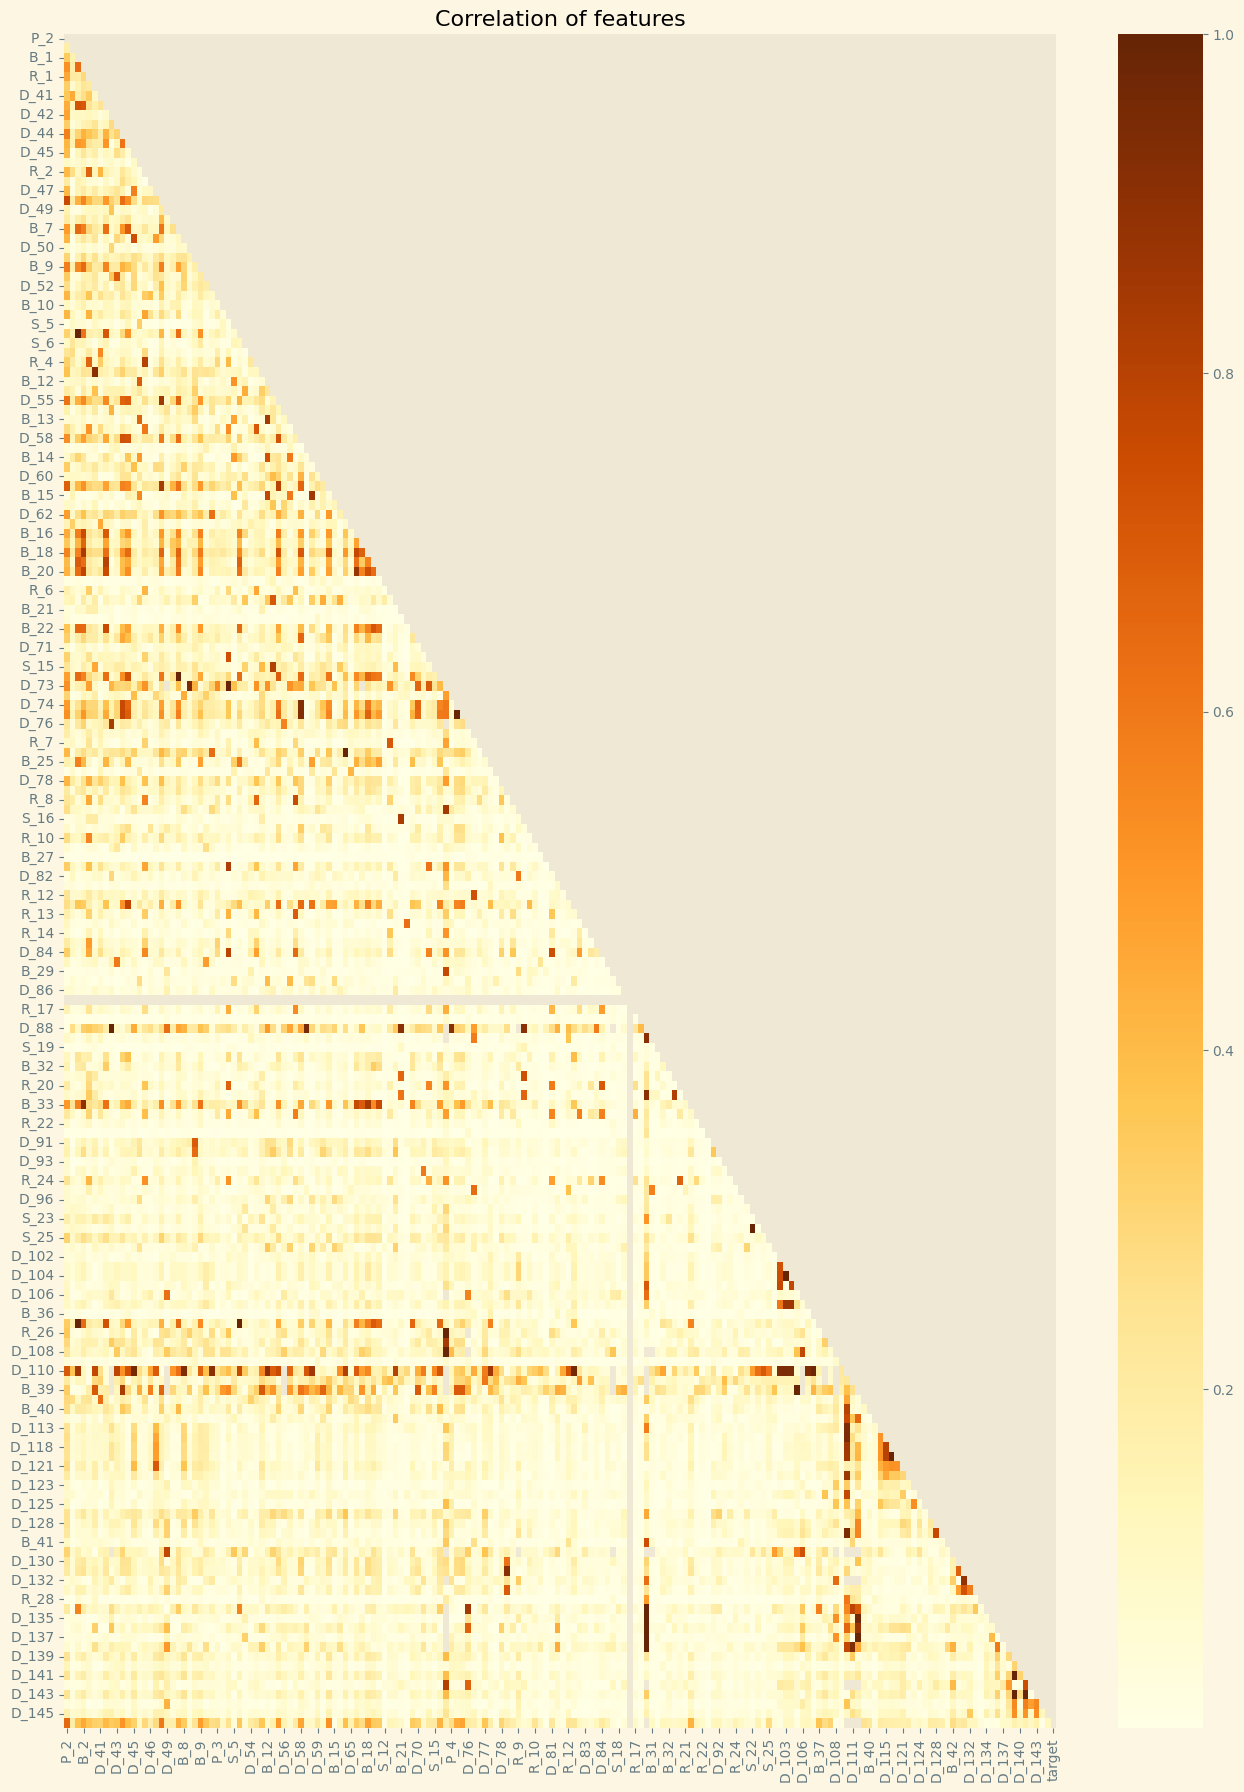

In [50]:
mask = np.triu(np.ones_like(correlations))# will return a upper triangle of an array of ones

fig,ax = plt.subplots(1,1,figsize=(16,22))

sns.heatmap(correlations,ax=ax,mask=mask,cmap='YlOrBr')
ax.set_title('Correlation of features')

plt.show()

The graph above shows us that most of the features are not correlated but there are visible 'dark' pixels meaning we have some hilighted correlated ones. In order to print them from most correlated to the least we have to unstack the results.

In [62]:
unstacked = correlations.unstack()
unstacked = unstacked.sort_values(ascending=False,kind='quicksort').drop_duplicates().head(25)
unstacked
#Returns a DataFrame having a new level of column labels whose inner-most level
#consists of the pivoted index labels.'''

D_88   D_137    1.000000
       D_138    1.000000
P_2    P_2      1.000000
D_135  D_88     1.000000
D_62   D_77     0.999767
D_104  D_103    0.999757
D_139  D_141    0.997882
D_73   R_26     0.997296
B_1    B_37     0.996727
B_11   B_1      0.995734
S_24   S_22     0.995156
B_7    B_23     0.994880
D_53   D_73     0.993929
D_143  D_139    0.993503
D_137  B_39     0.993426
B_37   B_11     0.992891
D_118  D_119    0.991763
D_143  D_141    0.991314
D_75   D_74     0.989511
B_39   D_105    0.988476
D_73   D_108    0.985718
D_110  B_36     0.978693
D_135  B_39     0.974662
D_110  B_28     0.962394
D_45   D_110    0.960988
dtype: float64

Indeed we have a lot of highly correlated features. Worth keeping this inn mind Let's plot a correlated features to visualize them. Because at each run sample is different results may vary a bit.

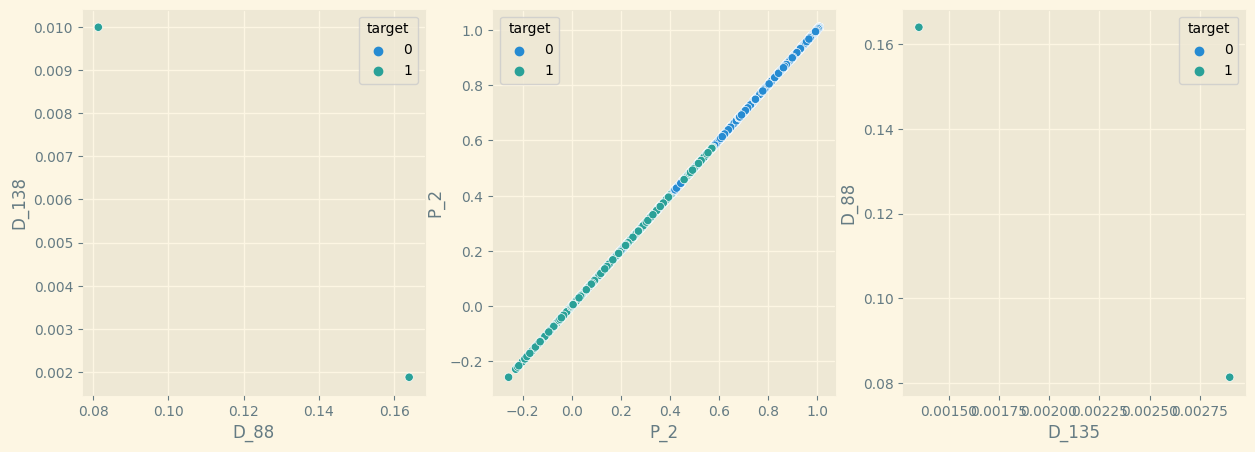

In [68]:
x1,y1 = unstacked.index[1]
x2,y2 = unstacked.index[2]
x3,y3 = unstacked.index[3]


fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=x1,y=y1,data=final_df,hue='target',ax=ax[0])
sns.scatterplot(x=x2,y=y2,data=final_df,hue='target',ax=ax[1])
sns.scatterplot(x=x3,y=y3,data=final_df,hue='target',ax=ax[2])

plt.show()

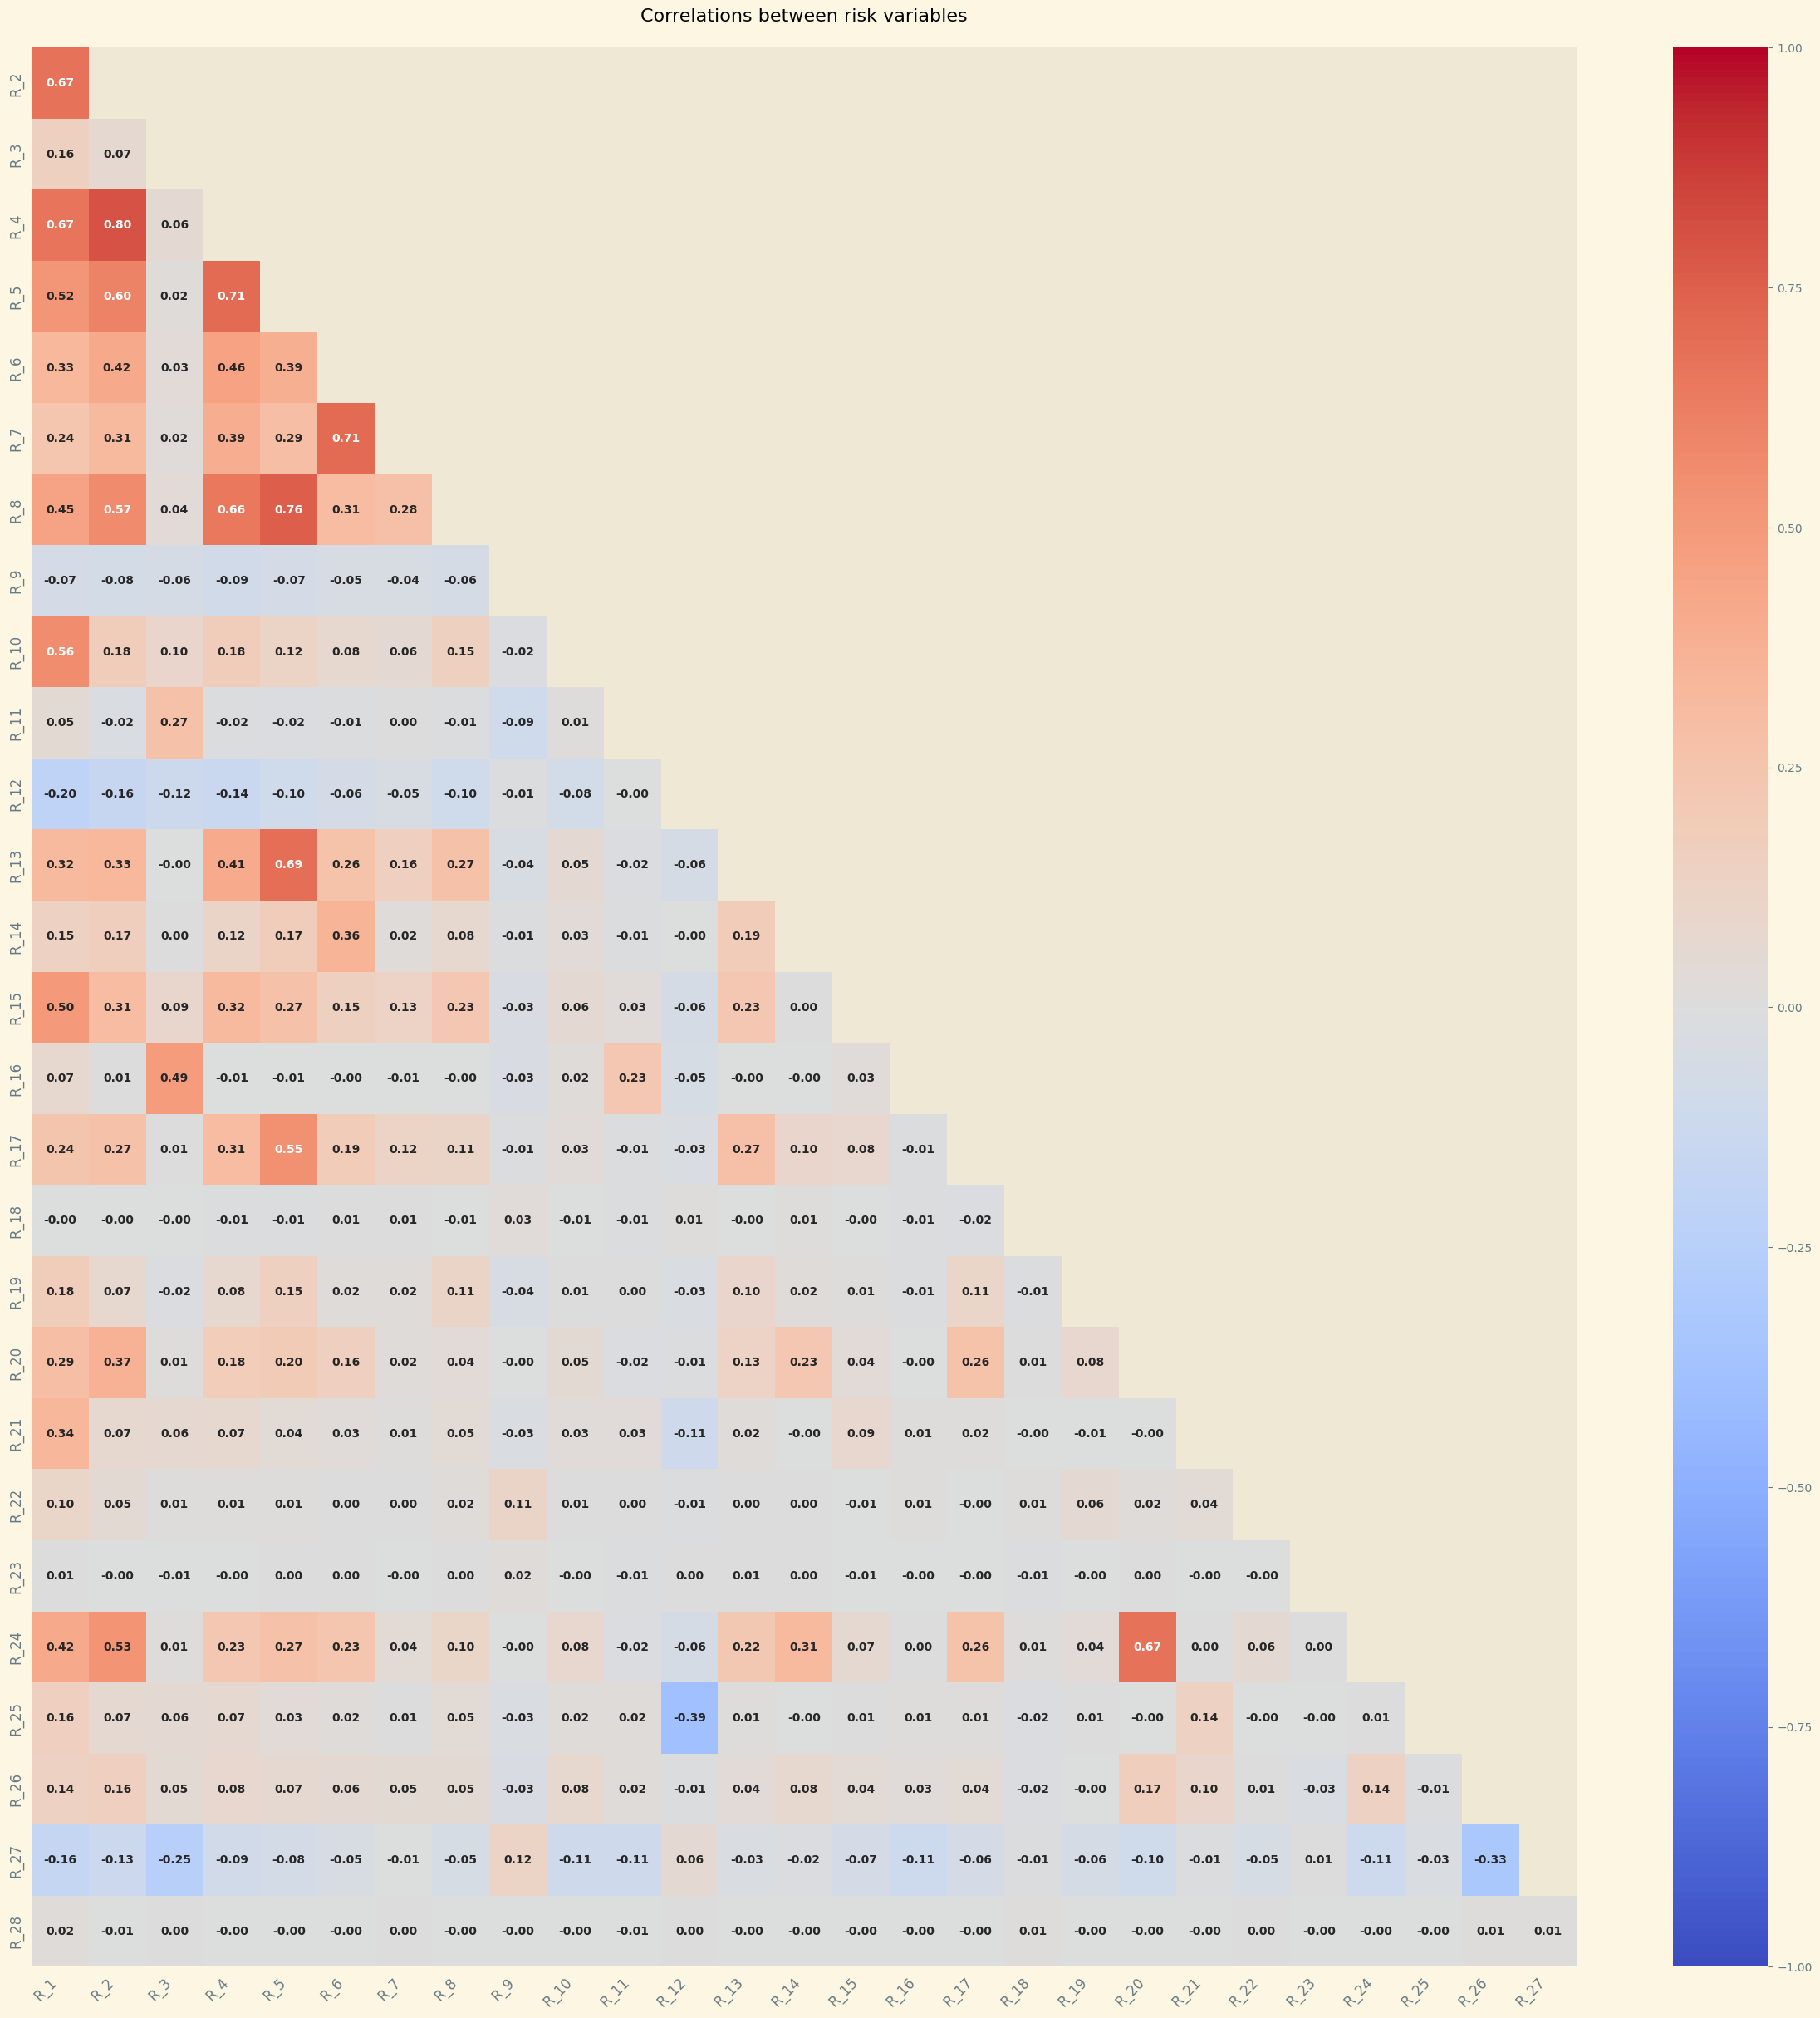

In [78]:
# correlations between risk variables

cols_to_show = [c for c in final_df.columns if (c.startswith('R'))]
corr = final_df[cols_to_show].corr()

mask=np.triu(np.ones_like(corr))[1:,:-1]
corr = corr.iloc[1:,:-1].copy()

fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,center=0,annot=True,fmt='.2f',
           cmap='coolwarm',annot_kws={'fontsize':10,'fontweight':'bold'})
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
plt.title('Correlations between risk variables\n',fontsize=16)
plt.show()

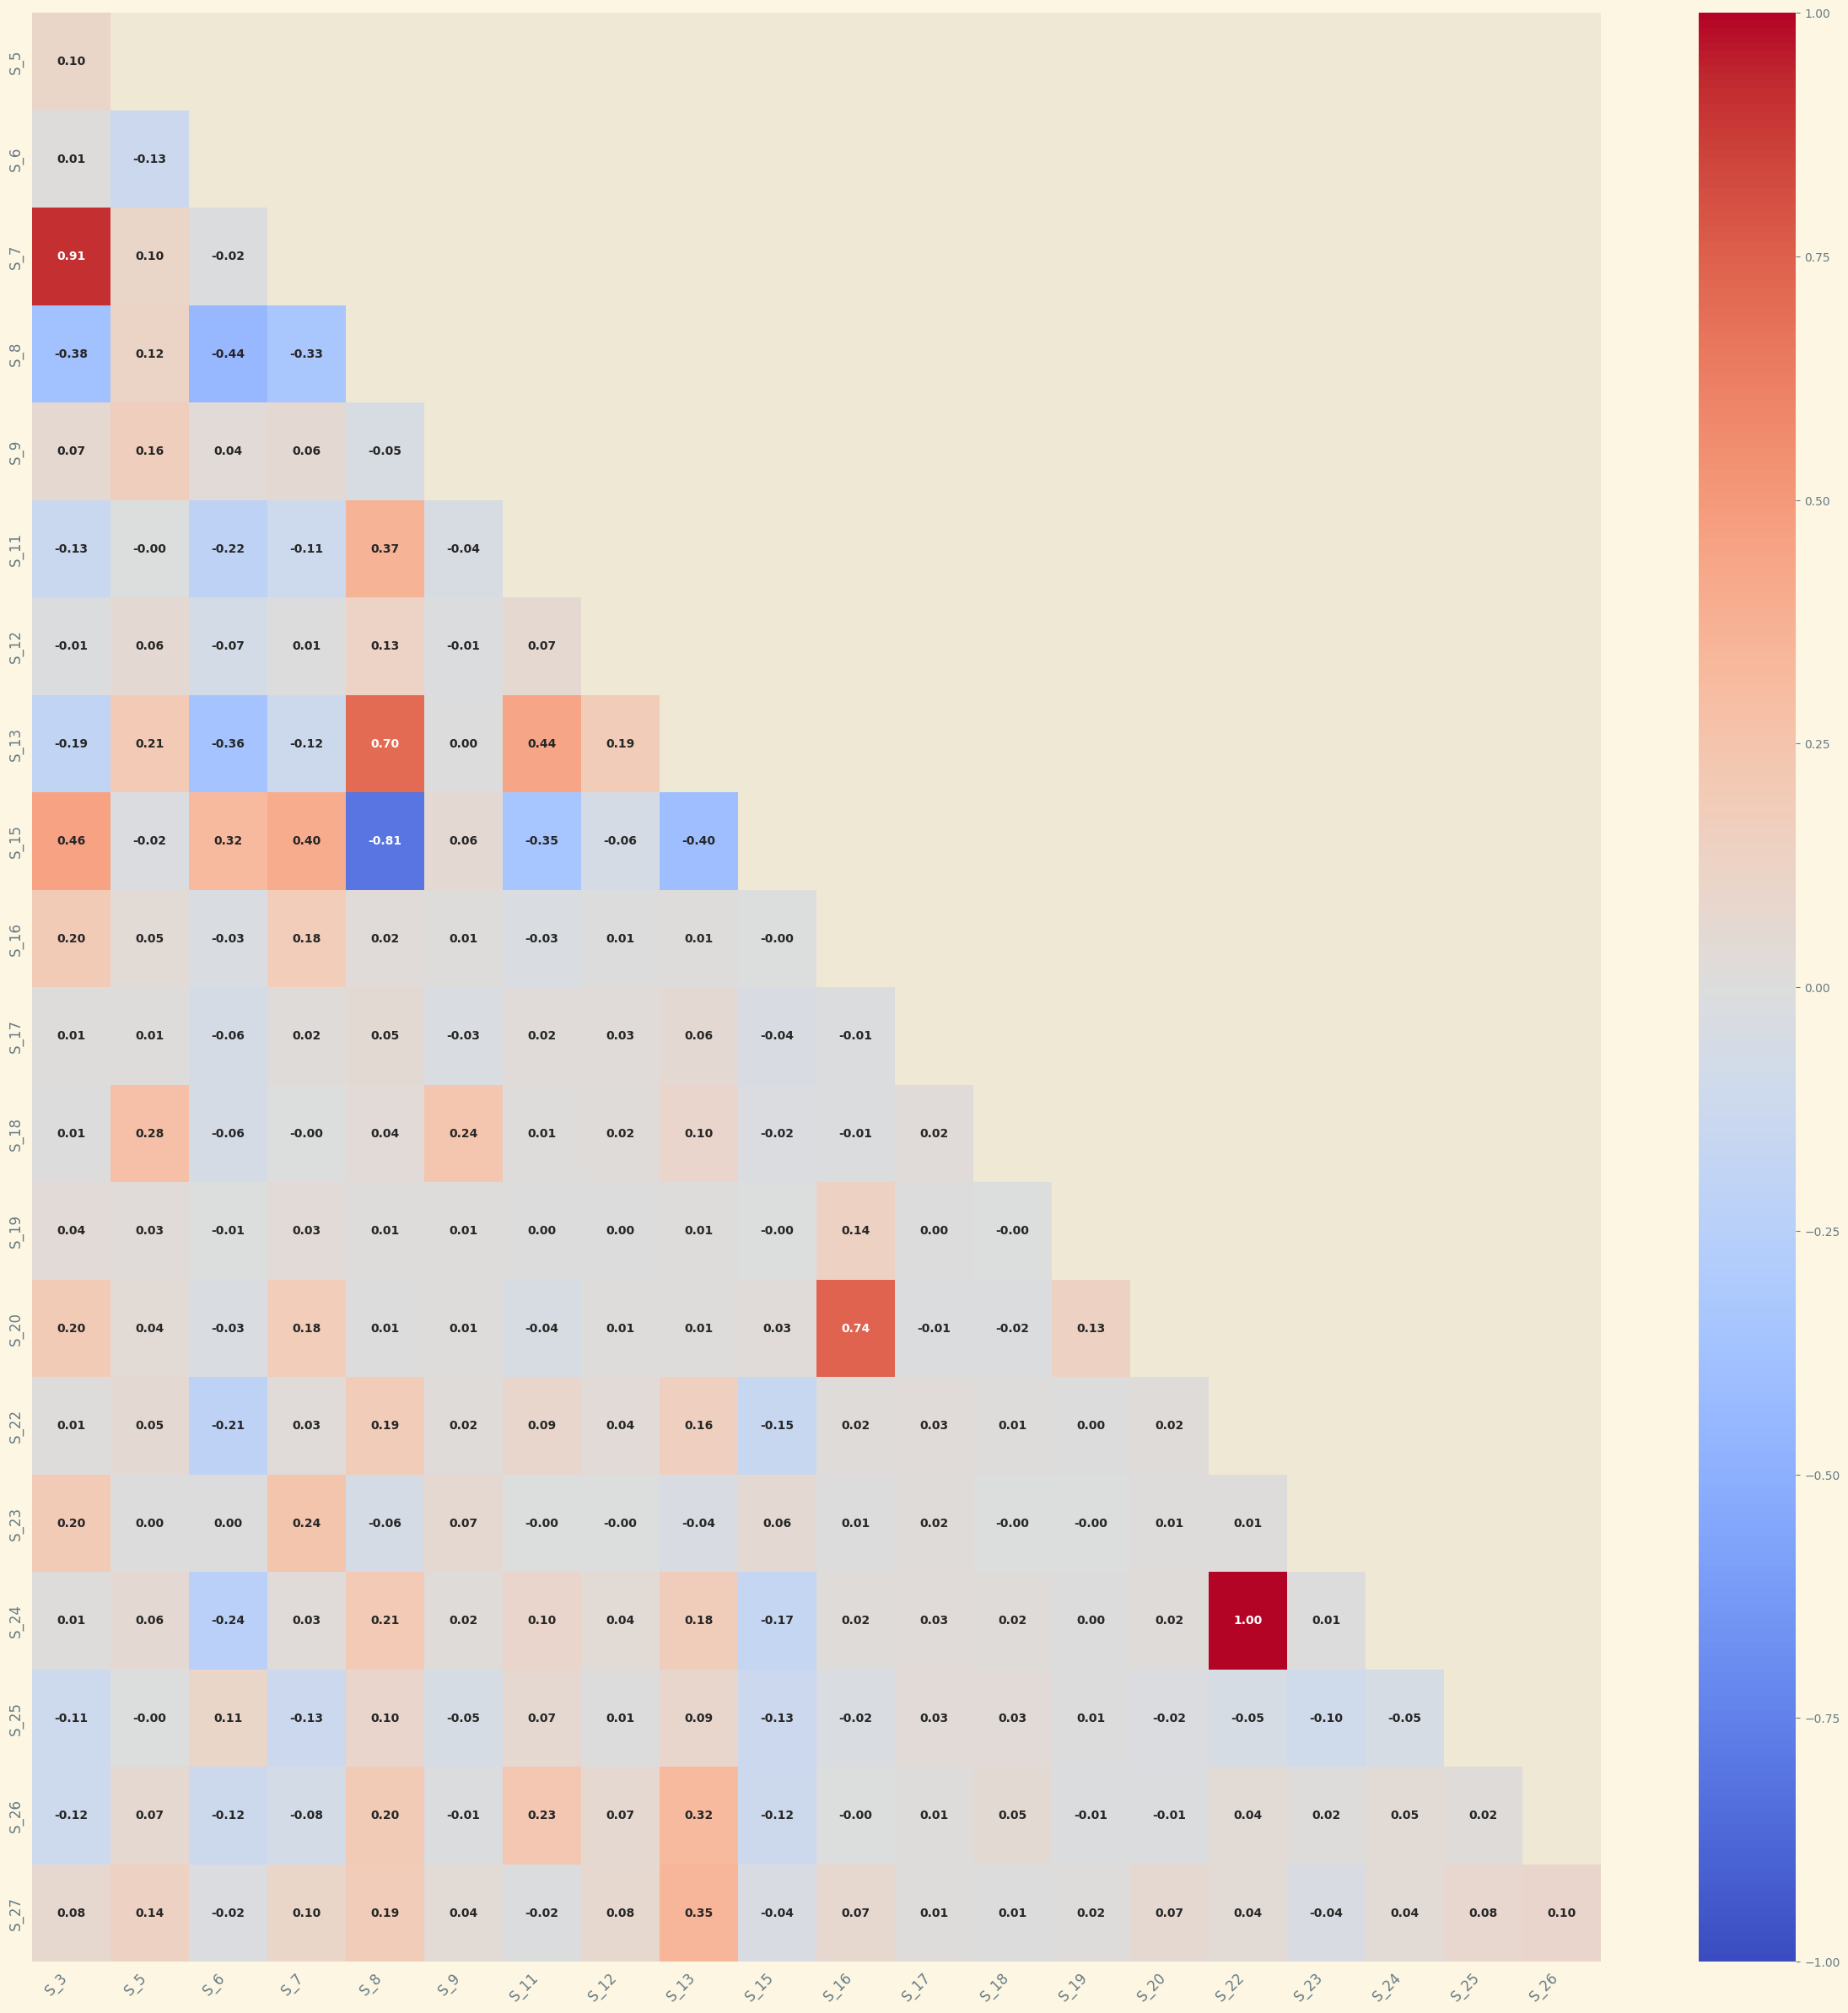

In [83]:
# Correlations between spend variables

cols_to_show = [c for c in final_df.columns if (c.startswith('S'))]
corr = final_df[cols_to_show].corr()

mask = np.triu(np.ones_like(corr))[1:,:-1]
corr = corr.iloc[1:,:-1].copy()

fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr,mask=mask,vmin=-1,vmax=1,annot=True,fmt='.2f',
            cmap='coolwarm',annot_kws={'fontsize':10,'fontweight':'bold'})
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12)
plt.show()

### Categorical Features

In [85]:
final_df[categorical_features].sample(10)

,B_30,B_38,D_63,D_64,D_66,D_68,D_114,D_116,D_117,D_120,D_126
7639,0.0,1.0,CO,O,1.0,4.0,0.0,0.0,3.0,0.0,1.0
6945,0.0,2.0,CO,U,NaN,4.0,1.0,0.0,3.0,0.0,1.0
1309,0.0,2.0,CR,U,NaN,5.0,1.0,0.0,-1.0,0.0,1.0
5163,0.0,3.0,CR,O,NaN,6.0,1.0,0.0,4.0,0.0,1.0
9931,0.0,2.0,CO,O,NaN,6.0,1.0,0.0,-1.0,0.0,1.0
9976,1.0,4.0,CO,O,NaN,6.0,1.0,0.0,3.0,0.0,1.0
5359,0.0,2.0,CO,O,NaN,6.0,1.0,0.0,-1.0,0.0,1.0
4417,0.0,3.0,CL,O,NaN,5.0,1.0,0.0,-1.0,0.0,1.0
8350,0.0,5.0,CO,U,NaN,6.0,0.0,0.0,-1.0,0.0,1.0
4993,0.0,2.0,CR,O,NaN,6.0,1.0,0.0,-1.0,0.0,1.0


What are the unique values per categorical columns

In [102]:
for cf in categorical_features:
    print(cf,list(final_df[cf].unique()))

B_30 [0.0, 2.0, 1.0]
B_38 [2.0, 1.0, 3.0, 5.0, 6.0, 7.0, 4.0]
D_63 ['CR', 'CO', 'CL', 'XZ', 'XM', 'XL']
D_64 ['O', 'R', nan, 'U', '-1']
D_66 [nan, 1.0, 0.0]
D_68 [6.0, 2.0, 3.0, nan, 5.0, 4.0, 0.0, 1.0]
D_114 [1.0, 0.0, nan]
D_116 [0.0, nan, 1.0]
D_117 [4.0, -1.0, 6.0, 2.0, 1.0, nan, 3.0, 5.0]
D_120 [0.0, 1.0, nan]
D_126 [1.0, nan, 0.0, -1.0]


How many missing values per category?

In [105]:
final_df[categorical_features].isna().sum().div(len(final_df)).mul(100).sort_values(ascending=False)

D_66     88.67
D_64      3.44
D_68      3.29
D_114     2.94
D_116     2.94
D_117     2.94
D_120     2.94
D_126     2.00
B_30      0.00
B_38      0.00
D_63      0.00
dtype: float64

### Distributions

In [113]:
[c for c in train_samples.columns if (c.startswith('D')) & (c not in categorical_features)]

['D_39',
 'D_41',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'D_50',
 'D_51',
 'D_52',
 'D_53',
 'D_54',
 'D_55',
 'D_56',
 'D_58',
 'D_59',
 'D_60',
 'D_61',
 'D_62',
 'D_65',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_73',
 'D_74',
 'D_75',
 'D_76',
 'D_77',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'D_86',
 'D_87',
 'D_88',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'D_112',
 'D_113',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

In [116]:
import math
def show_kdeplot(letter,figsize):
    cols = [c for c in train_samples.columns if (c.startswith((letter,'t'))) & (c not in categorical_features)]
    df_tmp = train_samples[cols]
    plt_cols = 5
    plt_rows = math.ceil(len(cols)/plt_cols)
    
    fig,axes = plt.subplots(plt_rows,plt_cols,figsize=figsize)
    for i, ax in enumerate(axes.reshape(-1)):
        if i < len(cols)-1:
            sns.kdeplot(x=cols[i],hue='target',hue_order=[1,0],label=['Default','Paid'],data=df_tmp,
                       fill=True,linewidth=2,legend=False,ax=ax)
            ax.tick_params(left=False,bottom=False,labelsize=5)
            ax.xaxis.get_label().set_fontsize(10)
            ax.set_ylabel('')
            
        sns.despine(bottom=True,trim=True) # Remove the top and right spines from plot(s)
        plt.tight_layout(rect=[0,0.2,1,0.99])
        plt.show()
        

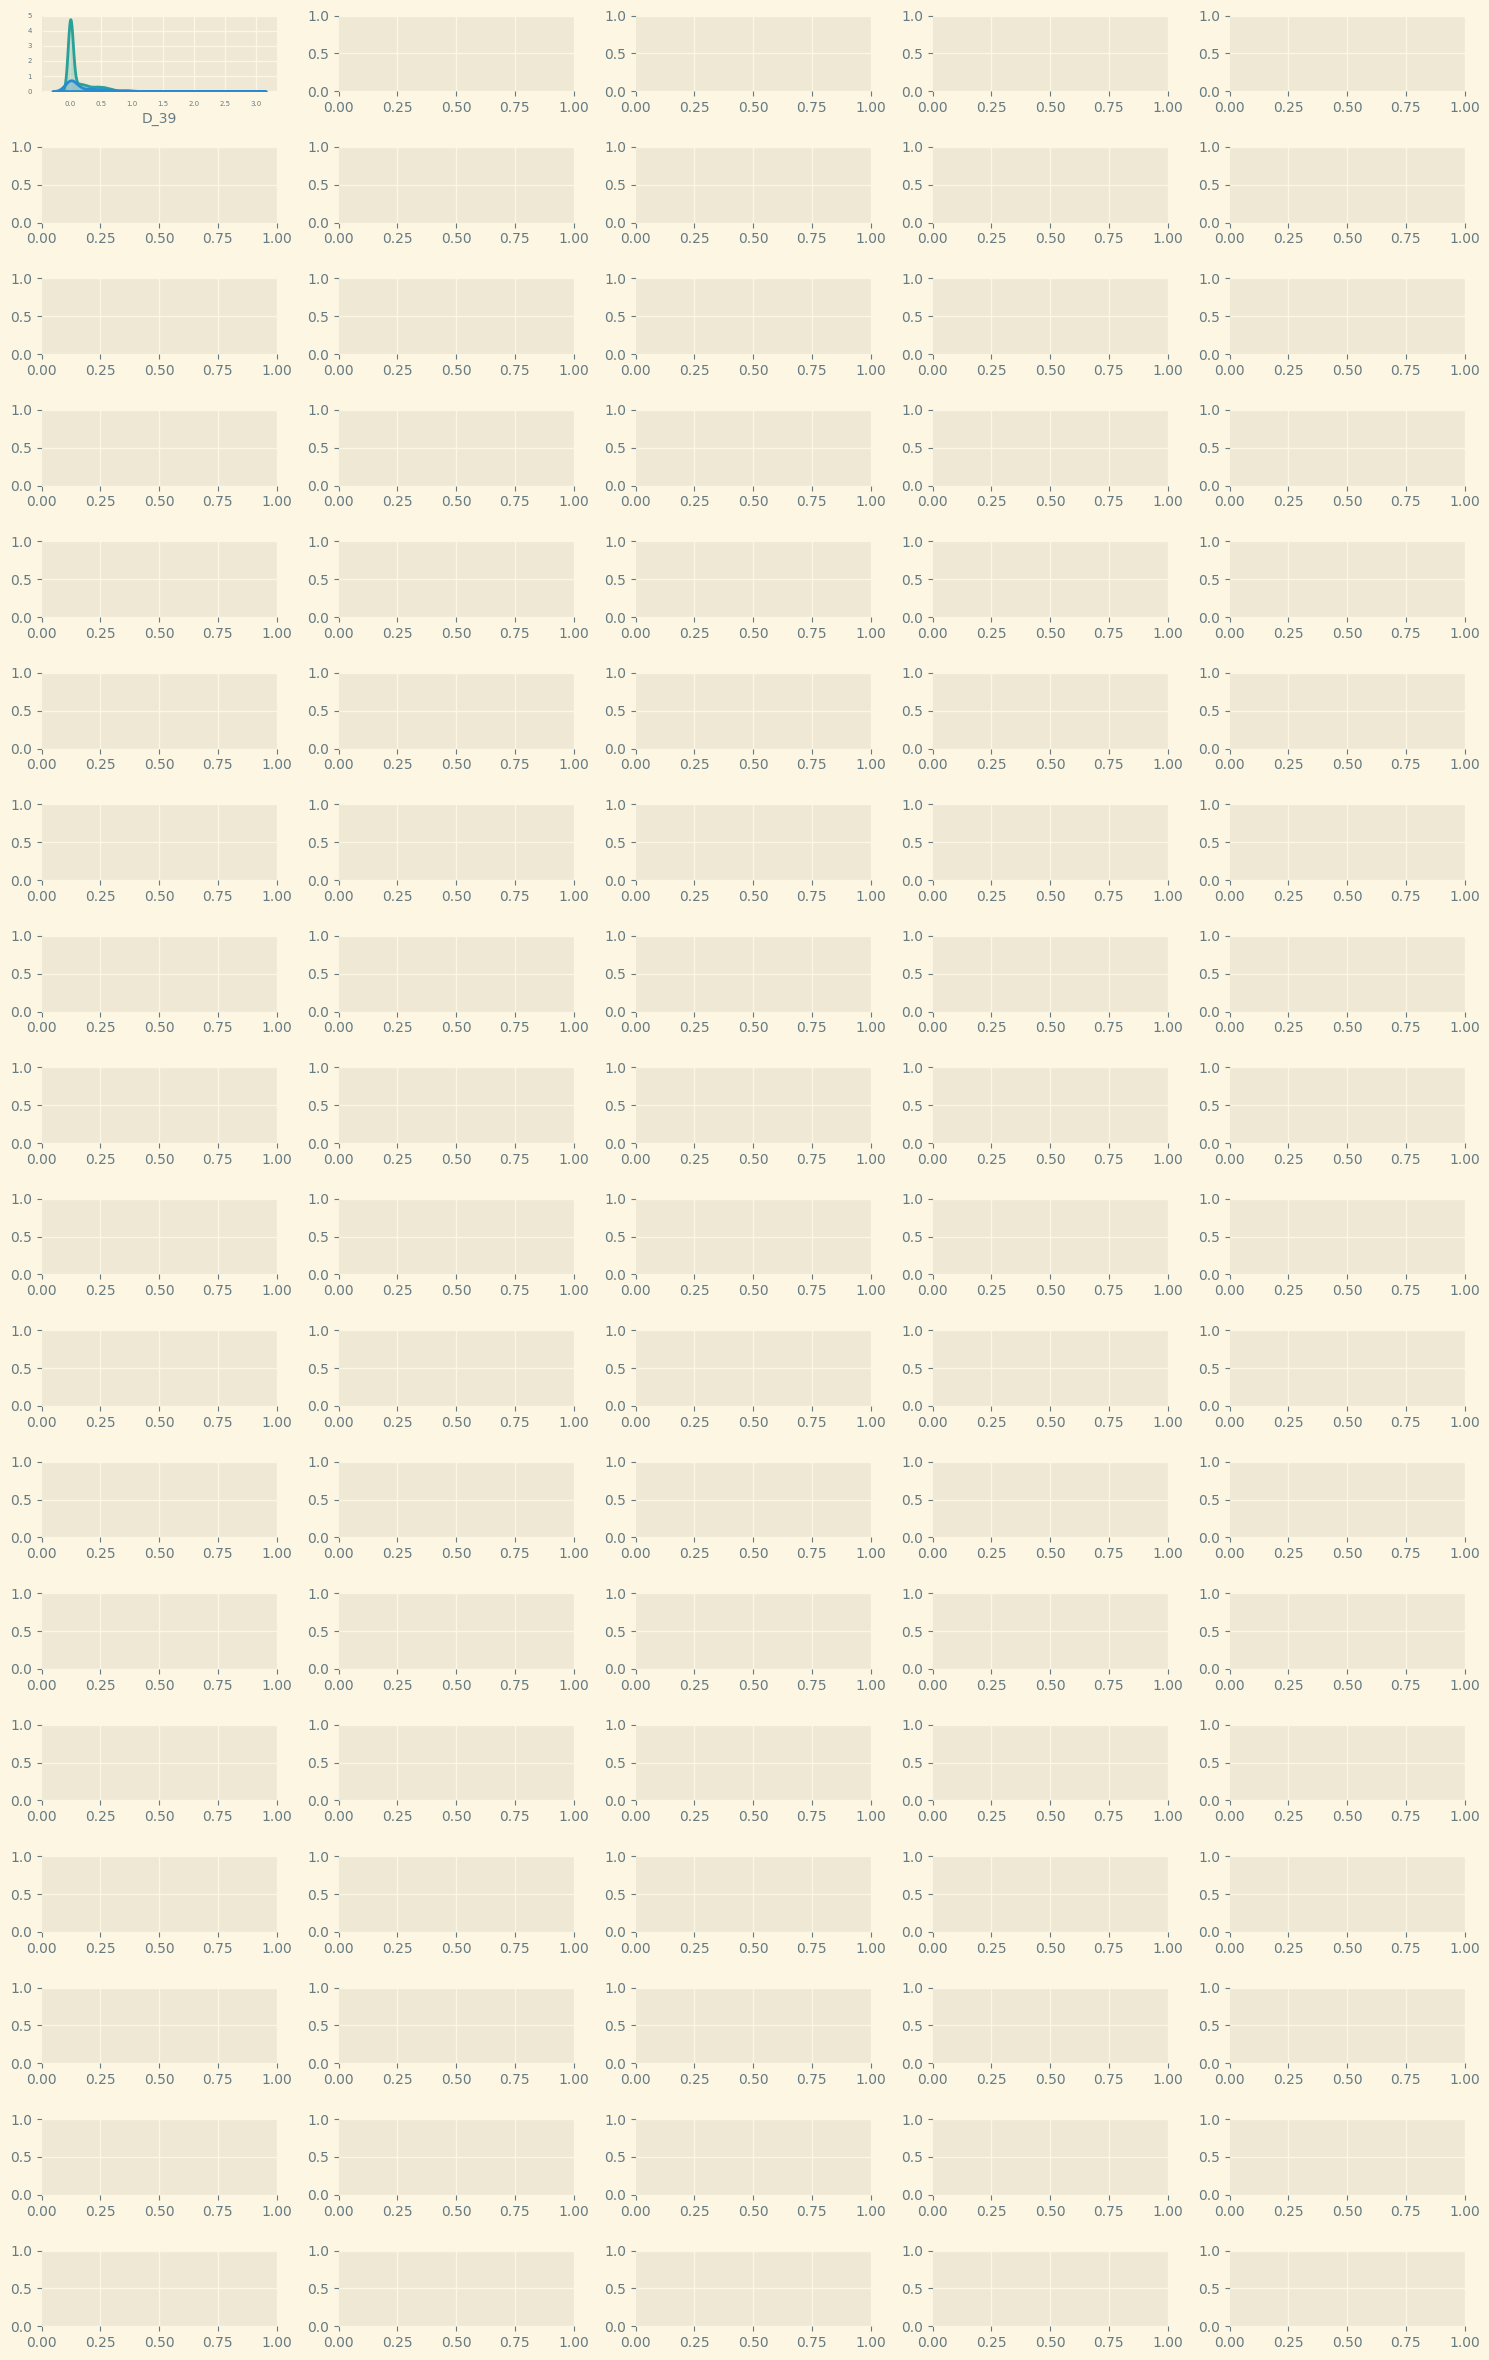

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [117]:
show_kdeplot('D',(15,30))